# Final Project - Explainer Notebook

**FROM PROJECT DESCRIPTION:** The explainer notebook should contain all the behind the scenes data-analysis stuff, details on the dataset, why you've selected these particular visualizations, explanations methodology, etc.

        **--Make sure that you use references when they're needed and follow academic standards--**

## Motivation

**FROM PROJECT DESCRIPTION:** What is your dataset? Why did you choose this/these particular dataset(s)? What was your goal for the end user's experience?

The dataset used in the project is downloaded from https://www.opendata.dk/city-of-copenhagen/trae_basis. The dataset contains all trees (park trees, street trees etc.) which are on the roads of Copenhagen muncipality. The dataset contains 59627 observations (trees) and has 183 features of which many are mostly filled with ``NaN`` values. 

The particular dataset was chosen as the authors of the notebook were very amazed by the visualization of the New York City street trees: https://www.cloudred.com/labprojects/nyctrees/. From the New York City visualization came a curiosity for finding out how the tree types of Copenhagen were distributed across district and what stories could be told about the street trees of Copenhagen.

The end goal was to take the user through the story about the street trees of Copenhagen. The idea is to show how the trees are distributed across the different districts of Copenhagen allowing the user to interact with the visualization and find what kind of trees might be close to the person. Besides this the idea was also to tell a different and original story, to make a seemingly boring dataset come to life and entertain the user.

## Basic Stats

**FROM PROJECT DESCRIPTION:** Write about your choices in data cleaning and preprocessing. Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

Usual imports and load of dataset.

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [4]:
# Import data
df = pd.read_csv("trae_basis.csv")
df.shape

C:\Users\Krist\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,41,46,47,48,49,50,62,64,65,69,71,73,76,79,83,89,103,117,122,135,136,137,147,156,157,158,167,168,174,175,176,177,178,179,180,181) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(59627, 183)

In [5]:
pd.set_option('display.max_columns', None) # Show all columns
df.head()

,FID,kategori,saerligt_trae,id,type,element,under_element,ny_dm_element,ny_dm_under_element,arbsted_tekst_id,driftsplan_navn,enhedsomraade,traeart,dansk_navn,slaegtsnavn,planteaar,plantet_halvaar,faeldningsaar,bydelsnavn,omraade,vejnavn,vejklasse,vejstatus,fritrumsprofil,stammeomfang,kronediameter,placering,afgraensning,plantemetode,omgivelse,vaekstmedie,beskyttelse,sundhed,skudtilvaekst,andre_vaekstforhold,bevaringsvaerdi,registrering_type,driftstatus_gadetrae,ejer,driftsorganisation,garantiperioden_udloeber,driftsaftale_edoc_nr,fredet_beskyttet_trae,fredningsmyndighed,trae_historie,botanisk_interesse,fredet_trae_foto,donor,anledning,saerlig_trae_bem,fredning_edoc_nr,ikonisk_trae,evighedstrae,bemaerkning,reg_dato,opdateret_dato,r_tidsstempel,r_risikofaktor,r_vaerdi,r_omgivelser,r_registrant,r_registreringsnummer,r_aendringer_rodzone_andet,r_gravearbejde_i_rodzonen,r_gravearbejde_dato,r_graveansvarlig,r_terraenaendring,r_terraenaendring_dato,r_belaegningsaendring_rodzonen,r_belaegningsaendring_dato,r_beplantningsaendring,r_beplantningsaendring_dato,r_aendring_i_graespleje,r_aendring_i_graespleje_dato,r_grundvandsaendring,r_grundvandsaendring_dato,r_sygdomme_skadedyr_andet,r_sygdomme,r_skadedyr,r_stammestruktur_andet,r_tvege,r_flerstammet,r_haeldning,r_kronestruktur_andet,r_ensidig,r_spidse_grenvinkler,r_lange_tunge_grene,r_stammeagtige_sidegrene,r_svag_grensammenhaeftning,r_kronen_andet,r_unormal_bladstoerrelse,r_tidligt_bladtab_hoestfarver,r_grene_mange_saar,r_saar_kritiske_steder_krone,r_daarlig_saarheling_krone,r_doede_grene_braekket_revne,r_revner_i_grene,r_maengden_af_doede_grene,r_stoerrelse_defekte_grene,r_toptoerhed,r_tyndloevet,r_beskaering,r_doedt_trae_staaende,r_stammen_andet,r_doed_bark,r_unormal_bark,r_slimflaad,r_indsunken_bark,r_indvokset_bark,r_store_gamle_saar,r_mange_saar_paa_stammen,r_saar_kritiske_steder_stamme,r_daarlig_saarheling_stamme,r_revner,r_defekter,r_stammeraad_hulhed_aaben,r_stammeraad_hulhed_lukket,r_rodzonen_andet,r_overfladisk_rodnet,r_omvoksende_roedder,r_rodskader,r_rodkageloesning,r_svamp_andet,r_honningsvamp,r_krumskaellet_skaelhat,r_kulsvamp,r_kaempe_poresvamp,r_lakporesvamp,r_skaellet_stilkporesvamp,r_svovlporesvamp,r_toendersvamp,r_oestershat,r_floejlsfod,r_laedersvamp,r_ukendt_svamp,r_ukendt_svamp_beskrivelse,r_birkeporesvamp,r_tilsynsaarsag_andet,r_kronesymptomer,r_struktur,r_svamp,r_skade_paa_roedder,r_raadmaaling_andet,r_raadmaaling_dato,r_naeste_raadmaaling_aar,r_undersoegelse_lift_andet,r_undersoegelse_lift_dato,r_handling_andet,r_handling,r_tid_for_handling,r_beskaeringsaar,r_tilsynsfrekvens,r_naeste_tilsyn_halvaar,r_skader_andet,r_materiel,r_person,r_link_til_edoc_sag,r_generelt_beplantning_andet,r_handling_for_beplantning,r_img01,r_img02,r_img03,r_img04,r_img05,r_img06,r_img07,r_img08,r_img09,r_img10,r_img11,r_img12,r_img13,r_img14,r_img15,torso_hoejde,torso_omkreds,torso_stamme,torso_sidst_stynet,torso_frekvens_styning,torso_naeste_styning,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry
0,trae_basis.1,gadetræ,nej,18611,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,Gadetræer Vesterbro-Kgs Enghave,Valby,Tilia platyphyllos,Storbladet lind,Lind,1953.0,Ikke registreret,Ikke registreret,Vesterbro-Kongens Enghave,Center Drift Syd CDS,Scandiagade,regional vej,Kommunevej,"4,5 m",30 - 40,Ikke registreret,Midterrabat,Med kant,Muld,Græs,> 15 m2,Ikke registreret,God,Ikke registreret,NaN,Ikke registreret,Gadetræ registreret før sommer 2009,Ikke registreret,TMF,TMF-Byens Drift,Ikke registreret,NaN,Ikke registreret,Ikke registreret,Ikke registreret,Ikke registreret,NaN,NaN,NaN,NaN,NaN,NaN,Ikke registreret,NaN,2007-09-21T00:00:00,2020-02-11T09:34:00.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

 The dataset thus contains 59.627 trees with 183 features. With this many features a thorough selection is needed to select only the most relevant features, these are listed below:
 
- ``planteaar``, the planting year of the tree.
- ``wkb_geometry``, the coordinates for each tree.
- ``donor``, specifies the donor of a tree if it has any.
- ``trae_historie``, specifies if the tree has any specific history.
- ``botanisk_interesse``, specifies if the tree has a specific botanical interess.
- ``slaegtsnavn``, the family name of the tree.
- ``bydelsnavn``, the name of the city district in which the tree is positioned in.
- ``ejer``,

The dataset is therefor limited to only these features.

In [6]:
focus_features = ['dansk_navn','id','slaegtsnavn','bydelsnavn','wkb_geometry',
                  'planteaar','donor','trae_historie','ejer','botanisk_interesse']
df=df[focus_features]
df.head()

,dansk_navn,id,slaegtsnavn,bydelsnavn,wkb_geometry,planteaar,donor,trae_historie,ejer,botanisk_interesse
0,Storbladet lind,18611,Lind,Vesterbro-Kongens Enghave,POINT (12.5370471883976 55.6486340745573),1953.0,NaN,Ikke registreret,TMF,Ikke registreret
1,Storbladet lind,21291,Lind,Vesterbro-Kongens Enghave,POINT (12.536925020477707 55.64867988581558),1953.0,NaN,Ikke registreret,TMF,Ikke registreret
2,Storbladet lind,21292,Lind,Vesterbro-Kongens Enghave,POINT (12.537000905330974 55.64876361021244),1953.0,NaN,Ikke registreret,TMF,Ikke registreret
3,Storbladet lind,21293,Lind,Vesterbro-Kongens Enghave,POINT (12.537133269649273 55.64872321507861),1953.0,NaN,Ikke registreret,TMF,Ikke registreret
4,Storbladet lind,21294,Lind,Vesterbro-Kongens Enghave,POINT (12.537399549194998 55.648992732825036),1953.0,NaN,Ikke registreret,TMF,Ikke registreret


Below the feature ``slaegtsnavn`` is looked at.

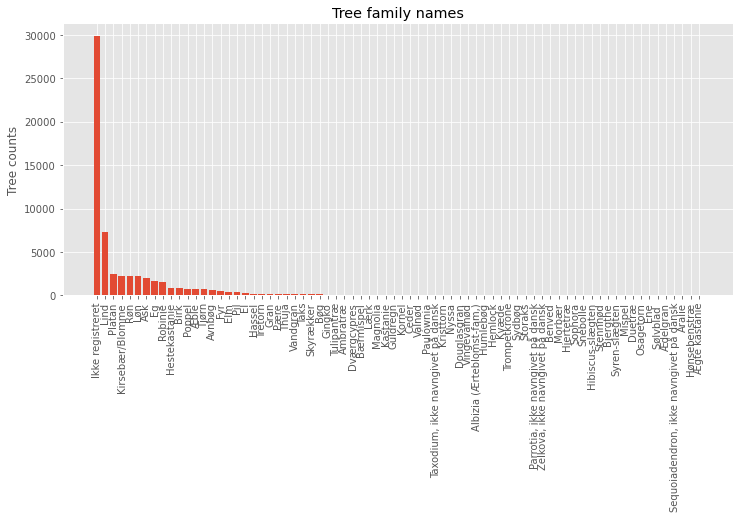

Number of tree families: 74


In [7]:
traer = df.groupby(['slaegtsnavn']).count().id
traer = traer.sort_values(ascending=False)
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(traer.index,traer.values)
plt.title("Tree family names")
plt.ylabel("Tree counts")
plt.xticks(rotation=90)
plt.show()
print("Number of tree families:",len(traer))

The plot shows that most of the tree family names are not registred trees (Ikke registreret) and that in total there are 74 tree family names. The columns ``traeart`` and ``dansk_navn``could also have been used. But these features had too many unique names for usage (+300) the visualizations would have been too confusing.

There are some trees which have a ``NaN`` entry as their family name, this is changed to *Ikke registreret*.

In [8]:
df.slaegtsnavn = df.slaegtsnavn.fillna("Ikke registreret")

As all the tree names currently are listed in danish the names are translated to english and showed in the column ``slaegtsnavn_eng``.

In [9]:
df['slaegtsnavn_eng']=df['slaegtsnavn']
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Ikke registreret', 'Not registered', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Lind', 'Linden', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Platan', 'Plane', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Kirsebær/Blomme', 'Cherry/Plum', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Røn', 'Rowan', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Løn', 'Maple', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Ask', 'Ash', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Eg', 'Oak', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Løn', 'Maple', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Robinie', 'Black locust', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Hestekastanie', 'Horse chestnut', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Birk', 'Birch', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Poppel', 'Poplar', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Æble', 'Apple', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Tjørn', 'Hawthorn', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Avnbøg', 'Hornbeam', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Fyr', 'Pine', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Pil', 'Willow', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('El', 'Alder', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Hassel', 'Hazel', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Tretorn', 'Honey locust', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Gran', 'Spruce', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Pære', 'Pear', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Vandgran', 'Dawn redwood', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Taks', 'Yew', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Skyrækker', 'Tree of heaven', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Bøg', 'Beech', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Tulipantræ', 'Tulip tree', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Ambratræ', 'Sweetgum', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Dværgcypres', 'False cypress', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Bærmispel', 'Juneberry', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Lærk', 'Larch', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Kastanie', 'Chestnut', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Guldregn', 'Golden rain', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Kornel', 'Cornus', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Ceder', 'Cedar', regex=False)
df['slaegtsnavn_eng']=df['slaegtsnavn_eng'].str.replace('Valnød', 'Walnut', regex=False)

In [12]:
df['donor']=df['donor'].str.replace('Eventyrernes klub', 'The Adventurers’ Club of Denmark', regex=False)
df['donor']=df['donor'].str.replace('Jf Peder Clement, modtaget fra Ålholm Arboret', 'Jf Peder Clement, received from Ålholm Arboret', regex=False)
df['donor']=df['donor'].str.replace('Journalistforbundet, American Red Wood Association', 'The journalist association, American Red Wood Association', regex=False)
df['donor']=df['donor'].str.replace('Indsamling i England og Danmark', 'Collection in England and Denmark', regex=False)
df['donor']=df['donor'].str.replace('Det Danske samfund i Østrig v. Barbara Kauders', 'Danish society in Austria w. Barbara Kauders', regex=False)
df['donor']=df['donor'].str.replace('Gartneribrugets afsætningsudvalg', 'Horticultural Farms Marketing Committee', regex=False)
df['donor']=df['donor'].str.replace('Foreningen til Hovedstadens Forskønnelse', 'The Association for the beutification of the capital', regex=False)
df['donor']=df['donor'].str.replace('Danmarks naturfrednings Forening', 'The Danish Society for Nature Conservation', regex=False)
df['donor']=df['donor'].str.replace('Den makedonske Ambassade', 'The Macedonian Embassy', regex=False)
df['donor']=df['donor'].str.replace('Plant et træ', 'Plant a tree', regex=False)
df['donor']=df['donor'].str.replace('Det Kgl. Danske Kunstakademi', 'Royal Danish Academy of Fine Arts', regex=False)
df['donor']=df['donor'].str.replace('SITAS planteskole', 'SITAS nursery', regex=False)


In [14]:
df['ejer']=df['ejer'].str.replace('Privat', 'Private', regex=False)
df['ejer']=df['ejer'].str.replace('KK andre end TMF', 'KK other than TMF', regex=False)
df['ejer']=df['ejer'].str.replace('Ikke registreret', 'Not registered', regex=False)

From the plot it can further be noticed that several trees have very few observations. To make the visualizations more simple all trees which have less than 25 observations are labeled as ``Minority trees``.

In [51]:
minority= df.groupby('slaegtsnavn').count()['id'][:]<25
minority=minority[minority==True]

for i in range(len(df['slaegtsnavn'])):
    if(df['slaegtsnavn'].iloc[i] in minority):
           df['slaegtsnavn_eng'].iloc[i]='Minority trees'

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Another feature which was found to be important was the column ``bydelsnavn``, below the distribution for this feature is shown.

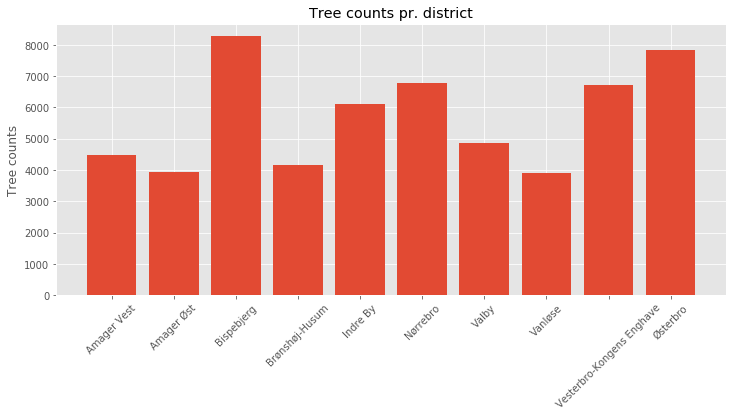

In [52]:
byer = df.groupby(['bydelsnavn']).count().id
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(byer.index,byer.values)
plt.title("Tree counts pr. district")
plt.ylabel("Tree counts")
plt.xticks(rotation=45)
plt.show()

From the graph it can be seen that the trees are distributed over 10 different districts. It should be noticed that Frederiksberg is not a part of these districts which is because Frederiksberg is a seperate mincipality and not a part of Copenhagen municipality. The district *Vesterbro-Kongens Enghave* is changed to simply *Vesterbro* for simplicity.

In [53]:
df['bydelsnavn']=df['bydelsnavn'].str.replace('Vesterbro-Kongens Enghave', 'Vesterbro', regex=False)

To use the feature ``planteaar`` the ``0`` entries and ``NaN`` values are filled with ``Not registered`` instead.

In [54]:
df['planteaar'].replace(0, 'Not registered', inplace=True)
df['planteaar'] = df['planteaar'].fillna('Not registered')
df['planteaar'].unique()

array([1953.0, 'Not registered', 1948.0, 2001.0, 1993.0, 2019.0, 1995.0,
       2012.0, 2013.0, 2005.0, 2018.0, 2016.0, 1900.0, 1978.0, 1992.0,
       2014.0, 1950.0, 1970.0, 1960.0, 1986.0, 1930.0, 1990.0, 1980.0,
       1971.0, 1985.0, 2000.0, 2004.0, 1945.0, 1955.0, 1910.0, 1880.0,
       2003.0, 1920.0, 2006.0, 1975.0, 1940.0, 1969.0, 2009.0, 2010.0,
       1982.0, 1954.0, 2015.0, 1999.0, 2007.0, 1983.0, 1981.0, 1890.0,
       1997.0, 1942.0, 2020.0, 1998.0, 1984.0, 1939.0, 1926.0, 1991.0,
       2011.0, 1974.0, 1951.0, 2008.0, 1946.0, 2002.0, 1965.0, 2017.0,
       1902.0, 1952.0, 1932.0, 1988.0, 1850.0, 1944.0, 1976.0, 1923.0,
       1967.0, 1924.0, 1977.0, 1987.0, 1941.0, 1931.0, 1901.0, 1936.0,
       1973.0, 1908.0, 1907.0, 1933.0, 1916.0, 1957.0, 1919.0, 1925.0,
       1906.0, 1943.0, 1935.0, 1927.0, 1972.0, 1979.0, 1989.0, 1909.0,
       1912.0, 1994.0, 1947.0, 1934.0, 1891.0, 1922.0, 1895.0, 1914.0,
       1886.0, 1928.0, 1899.0, 1996.0, 1964.0, 1961.0, 1918.0, 1937.0,
    

The same is done for ``donor``, ``trae_historie``, ``ejer`` and ``botanisk_interesse``.

In [58]:
df['donor'] = df['donor'].fillna('Not registered')
df['trae_historie'].replace('Ikke registreret', 'Not registered', inplace=True)
df['donor'].unique()

array(['Not registered', 'Eventyrernes klub',
       'Jf Peder Clement, modtaget fra Ålholm Arboret',
       'Journalistforbundet, American Red Wood Association', 'SITAS',
       'FTM', 'Indsamling i England og Danmark',
       'Det Danske samfund i Østrig v. Barbara Kauders',
       'Gartneribrugets afsætningsudvalg',
       'Foreningen til Hovedstadens Forskønnelse',
       'Danmarks naturfrednings Forening',
       'Jugendaustauschwerk im Kreis Gütersloh E.V.',
       'Den makedonske Ambassade',
       'Tokyo by v. Dr.Ryotaro Azuma, Governor of Tokyo',
       'Guangzhou International Award for Urban Innovation',
       'Valby Rotary Club', 'Plant et træ', 'Lions Club',
       'Det Kgl. Danske Kunstakademi', 'DSB', 'SITAS planteskole'],
      dtype=object)

## Sitas planteskole og sitas er det samme!!

# OBS! Hvad skal oversættes fra disse features?? Og ender vi med at bruge 'botanisk_interesse'?

To avoid having to run all the code above everytime the dataframe is saved as ``DataTransformed.csv`` and loaded again after.

In [63]:
#df.to_csv('DataTransformed.csv')
df = pd.read_csv('DataTransformed.csv')
df.head()

,Unnamed: 0,dansk_navn,id,slaegtsnavn,bydelsnavn,wkb_geometry,planteaar,donor,trae_historie,ejer,botanisk_interesse,slaegtsnavn_eng
0,0,Storbladet lind,18611,Lind,Vesterbro,POINT (12.5370471883976 55.6486340745573),1953.0,Not registered,Ikke registreret,TMF,Ikke registreret,Linden
1,1,Storbladet lind,21291,Lind,Vesterbro,POINT (12.536925020477707 55.64867988581558),1953.0,Not registered,Ikke registreret,TMF,Ikke registreret,Linden
2,2,Storbladet lind,21292,Lind,Vesterbro,POINT (12.537000905330974 55.64876361021244),1953.0,Not registered,Ikke registreret,TMF,Ikke registreret,Linden
3,3,Storbladet lind,21293,Lind,Vesterbro,POINT (12.537133269649273 55.64872321507861),1953.0,Not registered,Ikke registreret,TMF,Ikke registreret,Linden
4,4,Storbladet lind,21294,Lind,Vesterbro,POINT (12.537399549194998 55.648992732825036),1953.0,Not registered,Ikke registreret,TMF,Ikke registreret,Linden


To further get a quick understanding of how the trees are distributed a heatmat is plotted for all the observations using ``folium``. Therefor the ``wkb_geometry`` column is split into ``X`` and ``Y``.

In [64]:
df['X'] = df['wkb_geometry'].str[7:15]
df['Y'] = df['wkb_geometry'].str[25:-1]

In [68]:
import folium
from folium.plugins import HeatMap

heat_trees = df[['Y','X']]

# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in heat_trees.iterrows()]

# Plot it on the map
map_hooray = folium.Map([55.687784, 12.541356],tiles="Stamen Watercolor" ,zoom_start = 12)
HeatMap(heat_data, radius=11, max_zoom=18).add_to(map_hooray)
folium.TileLayer('Stamen Terrain').add_to(map_hooray)
# Display the map
map_hooray

The map shows how no trees are visible in Frederiksberg as mentioned earlier and that alot of trees are focused on the area of Østerbro/Nørrebro.

To help spread further light over the dataset information about the population and area of each of the districts are gathered from https://statistikbanken.kk.dk/1050dc07-e88c-4206-ae4e-645718e26ab9/ReportSection (population) and https://www.kk.dk/sites/default/files/2016_befolkningen_efter_bydele_og_areal.pdf (area).

Bolig priser. https://rkr.statistikbank.dk/statbank5a/SelectVarVal/Define.asp?MainTable=BM011&TabStrip=Select&PLanguage=0&FF=20

In [71]:
# Population data
district1 = ['Indre By', 'Østerbro','Nørrebro','Vesterbro','Valby','Vanløse',
        'Brønshøj-Husum','Bispebjerg','Amager Øst','Amager Vest']
population = [55866,79803,80254,72688,60308,41195,44784,55172,59803,78973] # Taget nytår 2019
temp1 = pd.DataFrame({'district':district1,'population':population})

# Area data
district2 = ['Indre By','Østerbro','Nørrebro','Vesterbro','Valby',
            'Vanløse','Brønshøj-Husum','Bispebjerg','Amager Øst','Amager Vest']
area = [9, 8.7, 4.1, 8.2, 9.2, 6.7, 8.7, 6.8, 9.1, 19.2] # area in km^2
temp2 = pd.DataFrame({'district':district2,'area':area})

# The tree counts
trees = df.groupby(['bydelsnavn']).count().id
temp3 = pd.DataFrame({'district':trees.index,'trees':trees.values})

temp11 = pd.merge(temp1,temp2,on='district')
df2 = pd.merge(temp11,temp3,on='district')
df2 = df2.sort_values('district', ascending=True) # Sort alphabetically
df2

,district,population,area,trees
9,Amager Vest,78973,19.2,4477
8,Amager Øst,59803,9.1,3930
7,Bispebjerg,55172,6.8,8268
6,Brønshøj-Husum,44784,8.7,4151
0,Indre By,55866,9.0,6105
2,Nørrebro,80254,4.1,6770
4,Valby,60308,9.2,4878
5,Vanløse,41195,6.7,3915
3,Vesterbro,72688,8.2,6710
1,Østerbro,79803,8.7,7835


# Income skal med! Brug bolig priser 
# Shape files?

## Data analysis
**FROM PROJECT DESCRIPTION:** Describe your data analysis and explain what you've learned about the dataset.

- Section for the maps
- Pop, area and trees plot
- Ratio plots
- Stacked bar chart
- 

If relevant, talk about your machine-learning.

## Genre
**FROM PROJECT DESCRIPTION:** Which genre of data story did you use? Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

## Visualization
**FROM PROJECT DESCRIPTION:** Explain the visualizations you've chosen. Why are they right for the story you want to tell?

## Discussion 
**FROM PROJECT DESCRIPTION:** Think critically about your creation. What went well? What is still missing? What could be improved?, Why?

## Contribution
**FROM PROJECT DESCRIPTION:** You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
It is not OK simply to write "All group members contributed equally".